# <span style='color:Red'>Understanding Variance, Covariance and Correlation:</span>
 * ### The below definitions have been discussed on _ECE4409_5_
   * ### <span style='color:Green'>Sample mean:</span>
   * #### Given a multivariate sample, The maximum likelihood estimator for the mean is the _sample mean_, $\boldsymbol{m}$:
     $$
           \Large \boldsymbol{m}=[m_1,m_2,......m_D] = \frac{\sum_{t=1}^{N}\mathbf{x}^t}{N}
          $$
        #### where $ \Large m_i=\frac{\sum_{t=1}^{N} x_i^t}{N}=\frac{x_i^1+x_i^2+.....+x_i^N}{N}$ is the mean of the $i^{th}$ feature.
        ####
        * #### NOTE: Here, $N$ is the number of data samples picked from the entire population.
          <br>
    * ### <span style='color:Green'>Sample Covariance:</span>
        * #### The estimator of $\Large \boldsymbol \Sigma$ is $\Large \boldsymbol {\mathcal{S}}$, the _sample covariance_ matrix, with entries 
          $$
           \Large \mathcal{s}_i^2 = \frac{\sum_{t=1}^{N}(x_i^t-m_i)^2}{N-1}
          $$
         $$
           \Large \mathcal{s}_{ij} = \frac{\sum_{t=1}^{N}(x_i^t-m_i)(x_j^t-m_j)}{N-1}
          $$
          <br>
    * ### <span style='color:Green'>Sample Correlation:</span>
        * #### The _sample correlation_ coefficients are:
          $$
           \Large \mathcal{r}_{ij} = \frac{\mathcal{s}_{ij}}{\mathcal{s}_{i}\mathcal{s}_{j}}
          $$

* ### With the above knowledge, lets understand intuitively the variance and covariance through the example dataset of $N=5$ instances/samples, each with $D=4$ features:
* $$
      \Large    \boldsymbol X = \begin{bmatrix}   x_1^1 & x_2^1 & x_3^1 & x_4^1 \\
                                  x_1^2 & x_2^2 & x_3^2 & x_4^2 \\
                                  x_1^3 & x_2^3 & x_3^3 & x_4^3 \\
                                  x_1^4 & x_2^4 & x_3^4 & x_4^4 \\
                                  x_1^5 & x_2^5 & x_3^5 & x_4^5 \\
      \end{bmatrix} \in \mathbb{R}^{[N\ \mathrm{x}\ D]}
$$

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'a':[1,3,4,6,8],
    'b':[2,3,5,6,8],
    'c':[6,5,4,3,2],
    'd':[5,4,3,4,6]
})
df

,a,b,c,d
0,1,2,6,5
1,3,3,5,4
2,4,5,4,3
3,6,6,3,4
4,8,8,2,6


* ### <span style='color:Blue'>Variance:</span>
    * #### Variance is the spread of values in a dataset around its mean value.
    * #### It tells you how far each number in the dataset is from its mean.
    * #### The formula for sample variance ($s^2$) is defined as follows:
  $$
      S_{i}^2=\frac{\sum_{t=1}^{N} (x^t_i-{m_i})^2}{N-1}
  $$
  #### where $m_i$ is the mean of feature $\mathbf{x}_i$
     * #### Variance is calculated by taking the difference of each number in the dataset from the mean, summing all the differences, and finally dividing it by the number of values in the dataset.
     * #### A large variance indicates that the numbers in the dataset are far from the mean and far from each other.
     * #### A small variance, on the other hand, indicates that the numbers are close to the mean and to each other.
     * #### A variance of 0 indicates that all the numbers in the dataset are the identical.
     * #### Finally, the valid value of variance is always a positive number (0 or more).

In [2]:
mean=df.mean()
mean

a    4.4
b    4.8
c    4.0
d    4.4
dtype: float64

In [3]:
variance=(np.square(df - df.mean())).sum() / (df.shape[0] - 1)
variance

a    7.3
b    5.7
c    2.5
d    1.3
dtype: float64

* ### <span style='color:Blue'>Covariance:</span>
    * #### While variance measures the spread of data within its mean value, Covariance measures the relationship between two features
    * #### In statistics, covariance is the measure of the directional relationship between two random variables.
    * #### The formula for covariance is:
      $$
      \Large cov(\mathbf{x}_i,\mathbf{x}_j)=\mathcal{S}_{ij}=\frac{\sum_{t=1}^N \{(x_i^t-m_i)(x_j^t-m_j)\}}{N-1}
      $$

* ### Let’s plot a scatter plot to see how the columns in our dataframe relate to each other. We shall start with the a and b columns first:

array([[7.3 , 6.35],
       [6.35, 5.7 ]])

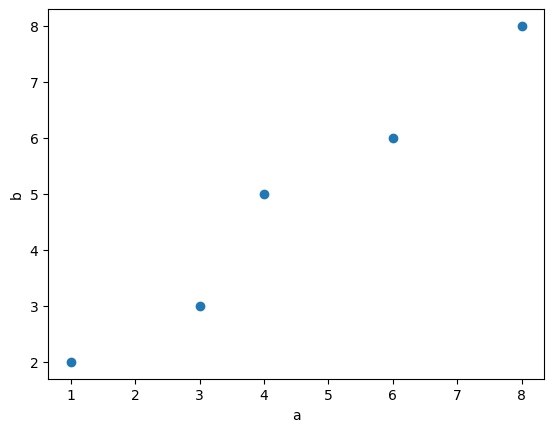

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['a'], df['b'])
plt.xlabel('a')
plt.ylabel('b')
np.cov(df['a'],df['b'])

&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    <img src="images/Variance2.png" width="200" height="100">

 * #### As you can see, there seems to be a trend between $a$ and $b$; as $a$ increases, so does $b$.
 * #### In statistics, $a$ and $b$ are known to have a positive covariance.
 * #### A positive covariance indicates that both random variables (features) tend to move upward or downward at the same time.

### How about columns b and c? Let’s see:

array([[ 5.7 , -3.75],
       [-3.75,  2.5 ]])

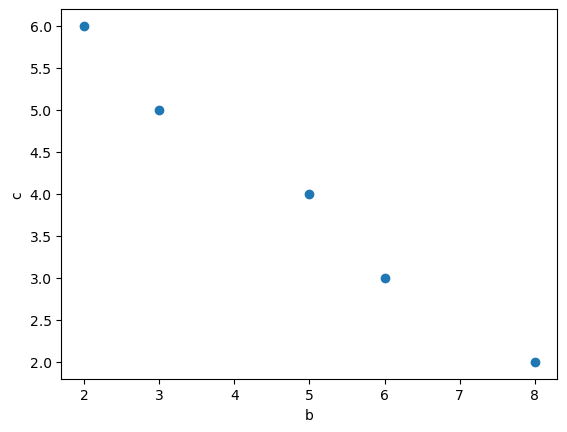

In [5]:
plt.scatter(df['b'], df['c'])
plt.xlabel('b')
plt.ylabel('c')
np.cov(df['b'], df['c'])

   * #### This time round, the trend seems to go the other way – as b increases, c decreases.
   * #### In statistics, b and c are known to have a negative covariance.
   * #### A negative covariance indicates that both variables tend to move away from each other – when one moves upward the other moves downward, and vice versa.

* ### Finally, let’s examine columns c and d:

array([[ 2.5, -0.5],
       [-0.5,  1.3]])

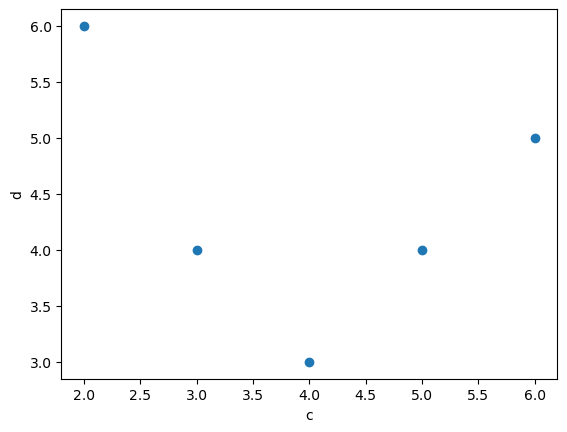

In [6]:
plt.scatter(df['c'], df['d'])
plt.xlabel('c')
plt.ylabel('d')
np.cov(df['c'], df['d'])

   * #### There doesn’t seem to exist a direct linear relationship between c and d.
   * #### In statistics, c and d are known to have zero covariance (or close to zero). When two random variables are independent, the covariance will be zero.
   * #### However, the reverse is not necessarily true – a covariance of zero does not mean that 2 random variables are independent (a non-linear relationship can still exist between 2 random variables that has zero covariance).
   * #### In the above example, you can see that there exists some sort of non-linear v-shape relationship.
   * #### While the covariance measures the directional relationship between 2 random variables, it does not show the strength of the relationship between the 2 random variables. Its value is not constrained and can be from $-\infty$ to $+\infty$.
   * #### Also, covariance is dependent on the scale of the values. For example, if you double each value in columns $a$ and $b$, you will get a different covariance:

In [7]:
np.cov(df['a']*2, df['b']*2)

array([[29.2, 25.4],
       [25.4, 22.8]])

* ### Therefore, a much better way to measure the strength of two random variables is correlation.
  * ### <span style='color:Blue'>Correlataion:</span>
      * #### The correlation between two random variables measures both the strength and direction of a linear relationship that exists between them.
      * #### Pearson Correlation Coefficient, is one way to measure the correlation. It captures the strength and direction of the linear association between two continuous variables.
      * #### The formula for Pearson Correlation Coefficient is:
        $$
         \mathcal{r_{ij}}=\frac{\mathcal{S}_{ij}}{\mathcal{S}_i\mathcal{S}_j}=\frac{\frac{\sum_{t=1}^N \{(x_i^t-m_i)(x_j^t-m_j)\}}{N-1}}{\sqrt{\frac{\sum_{t=1}^N (x_i^t-m_i)^2}{N-1}}\sqrt{\frac{\sum_{t=1}^N (x_j^t-m_j)^2}{N-1}}}=
         \frac{ \sum_{t=1}^N \{(x_i^t-m_i)(x_j^t-m_j)\}}{\sqrt{\sum_{t=1}^N (x_i^t-m_i)^2}\sqrt{\sum_{t=1}^N (x_j^t-m_j)^2}}
        $$
       * #### The Pearson Correlation Coefficient is defined to be the covariance of $\mathbf{x}_i$ and $\mathbf{x}_j$ divided by the product of each feature’s standard deviation.
       * #### The correlation between 'a' and 'b' is:

In [8]:
df[['a','b']].corr()

,a,b
a,1.000000,0.984407
b,0.984407,1.000000


   * #### The diagonal values of 1 indicates the correlation of each column to itself. Obviously, the correlation of $a$ to $a$ itself is 1, and so is that for column $b$.
   * #### The value of 0.984407 is the Pearson correlation coefficient of $a$ and $b$.
   * #### The Pearson correlation coefficient of $b$ and $c$ is -0.993399:

In [9]:
df[['b','c']].corr()

,b,c
b,1.000000,-0.993399
c,-0.993399,1.000000


   * #### The Pearson correlation coefficient of $c$ and $d$ is -0.27735:

In [10]:
df[['c','d']].corr()

,c,d
c,1.00000,-0.27735
d,-0.27735,1.00000


   * #### Like covariance, the sign of the Pearson correlation coefficient indicates the direction of the relationship.
   * #### However, the values of the Pearson correlation coefficient are constrained to be between -1 and 1.
   * #### Based on the value, you can deduce the following degrees of correlation:
        * #### __Perfect__ – values near to ±1
        * #### __High degree__ – values between ±0.5 and ±1
        * #### __Moderate degree__ – values between ±0.3 and ±0.49
        * #### __Low degree__ – values below ±0.29
        * #### __No correlation__ – values close to 0
          <br>
* ### Understanding the correlations between the various columns in your dataset is an important part of the process of preparing your data for machine learning.
* ### You want to train your model using the columns that has the highest correlation with the label of your dataset.

# <span style='color:Red'>Dimensionality Reduction:</span>[Ref: Chapter 6 of [[1]](https://erp.metbhujbalknowledgecity.ac.in/StudyMaterial/01VM092015008350131.pdf)]
   * #### In most learning algorithms, the complexity depends on the number of input dimensions (or features), $D$, as well as on the number of the data points/instances, $N$.
   * #### For reduced memory and computation, we are interested in reducing the dimensionality of the problem.
   * #### Decreasing $D$ also decreases the complexity of the inference algorithm during testing.
   * #### When an input (or feature) is decided to be unnecessary, we save the cost of extracting it.
   * #### Simpler models are more robust on small datasets. Simpler models have less variance, that is, they vary less depending on the particulars of a sample, including noise, outliers, and so forth.
   * #### When data can be explained with fewer features, we get a better idea about the process that underlies the data and this allows knowledge extraction.
   * #### When data can be represented in a few dimensions without loss of information, it can be plotted and analyzed visually for structure and outliers.
   * #### There are two main methods for reducing dimensionality:
       * #### Feature selection and
       * #### Feature extraction.

  * ### <span style='color:Blue'>Feature selection:</span>
      * #### In feature selection, we are interested in finding $k$ of the $D$ dimensions that give us the most information and we discard the other ($D − k$) dimensions.
      * #### _Subset selection_ is a feature selection method. 
  * ### <span style='color:Blue'>Feature extraction:</span>
      * #### In feature extraction, we are interested in finding a new set of $k$ dimensions that are combinations of the original $d$ dimensions.
      * #### These methods may be supervised or unsupervised depending on whether or not they use the output information.
      * #### The best known and most widely used feature extraction methods are __Principal Components Analysis (PCA)__ and __Linear Discriminant Analysis (LDA)__, which are both linear projection methods, unsupervised and supervised respectively.

* ## <span style='color:Blue'>Feature selection methods:</span>
    * ### <span style='color:Green'>Subset Selection:</span>
        * #### In subset selection, we are interested in finding the best subset of the set of features.
        * #### The best subset contains the least number of dimensions that most contribute to accuracy. We discard the remaining, unimportant dimensions.
        * #### Using a suitable error function, this can be used in both regression and classification problems.
        * #### There are $2^D$ possible subsets of $D$ features, but we cannot test for all of them unless $D$ is small and we employ heuristics to get a reasonable (but not optimal) solution in reasonable (polynomial) time.
    * #### <span style='color:Green'>Forward Selection:</span>
        * #### In forward selection, we start with no features and add them one by one, at each step adding the one that decreases the error the most, until any further addition does not decrease the error (or decreases backward selection it only sightly).
        * #### Let us denote by $F$, a feature set of input dimensions, $x_i, i = 1, . . . , D$.
        * #### $E(F)$ denotes the error incurred on the validation sample when only the inputs in $F$ are used.
        * #### Depending on the application, the error is either the mean square error or the misclassification error.
          <br>
        * #### In sequential forward selection, we start with no features: $F = \emptyset$.
        * #### At each step, for all possible $x_i$ , we train our model on the training set and calculate $E(F \cup x_i)$ on the validation set.
        * #### Then, we choose that input $x_j$ that causes the least error:
          $$
              j=\arg \min_i E(F \cup x_i)
          $$
          #### and we add $x_j$ to $F$ if
          $$E(F \cup x_j)<E(F)$$
        * #### We stop if adding any feature does not decrease E.
        * #### We may even decide to stop earlier if the decrease in error is too small, where there is a user-defined threshold that depends on the application constraints, trading off the importance of error and complexity.
        * #### Adding another feature introduces the cost of observing the feature, as well as making the classifier/regressor more complex.
          <br>
        * #### The sequential forward selection is a local search procedure and does not guarantee finding the optimal subset, namely, the minimal subset causing the smallest error.
        * #### For example, $x_i$ and $x_j$ by themselves may not be good but together may decrease the error a lot, but because this algorithm is greedy and adds attributes one by one, it may not be able to detect this.
        * #### It is possible to generalize and add multiple features at a time, instead of a single one, at the expense of more computation.
        * #### We can also backtrack and check which previously added feature can be removed after a current addition, thereby increasing the search space, but this increases complexity.
          <br>
   * #### <span style='color:Green'>Backward Selection:</span>
        * #### In backward selection, we start with all features and remove them one by one, at each step removing the one that decreases the error the most (or increases it only slightly), until any further removal increases the error significantly.
        * #### In both forward and backward selection cases, checking the error should be done on a validation set distinct from the training set because we want to test the generalization accuracy.
        * #### With more features, generally we have lower training error, but not necessarily lower validation error.
          <br>
        * #### In sequential backward selection, we start with $F$ containing all features and do a similar process as forward selection, except that we remove one attribute from $F$ as opposed to adding to it, and we remove the one that causes the least error:
          $$
              j=\arg \min_i E(F - x_i)
          $$
          #### and we remove $x_j$ to $F$ if
          $$E(F \cup x_j)<E(F)$$
        * #### We stop if removing a feature does not decrease the error.
        * #### To decrease complexity, we may decide to remove a feature if its removal causes only a slight increase in error.
        <br>
    * ### However, In an application like face recognition, feature selection is not a good method for dimensionality reduction because individual pixels by themselves do not carry much discriminative information; it is the combination of values of several pixels together that carry information about the face identity. This is done by feature extraction methods.

* ## <span style='color:Blue'>Feature extraction methods:</span>
* ### <span style='color:Green'>Principal component analysis (PCA):</span>
    * #### In projection methods, we are interested in finding a mapping from the inputs in the original $D$-dimensional space to a new $(k < D)$-dimensional space, with minimum loss of information.
    * #### The projection of the datapoint $\mathbf{x}$ on the direction of $\mathbf{w}$ is:
      $$
     \Large  z=\mathbf{w}^T\mathbf{x}
      $$
    * #### Principal components analysis (PCA) is an unsupervised method in that it does not use the output information; the criterion to be maximized is the variance.
    ### <span style='color:Brown'>First principal component:</span>
    * #### The principal component is $\mathbf{w}_1$ such that the sample, after projection onto $\mathbf{w}_1$, is most spread out so that the difference between the sample points becomes most apparent.
    * #### For a unique solution and to make the direction the important factor, we require $||\mathbf{w}_1||$ = 1
    * #### The mean and variance of the projected datapoint $z_1$, which is the projection of $\mathbf{x}$ on the direction of $\mathbf{w_1}$, is:
      $$
         \Large  z_1=\mathbf{w_1}^T\mathbf{x}
      $$
      $$
        \Large E[z_1]= E[\mathbf{w_1}^T\mathbf{x}]=\mathbf{w_1}^TE[\mathbf{x}]=\mathbf{w_1}^T\mu
      $$
      $$
        \Large  Var[\mathbf{w_1}^T\mathbf{x}]=E[(\mathbf{w_1}^T\mathbf{x}-\mathbf{w_1}^T\mu)^2]=E[(\mathbf{w_1}^T\mathbf{x}-\mathbf{w_1}^T\mu)(\mathbf{w_1}^T\mathbf{x}-\mathbf{w_1}^T\mu)]
      $$
      $$
        \Large  Var[\mathbf{w_1}^T\mathbf{x}]=E[\mathbf{w_1}^T(\mathbf{x}-\mu)(\mathbf{x}-\mu)^T\mathbf{w_1}]=\mathbf{w_1}^TE[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^T]\mathbf{w_1}
      $$
      $$
        \Large  Var[\mathbf{w_1}^T\mathbf{x}]=\mathbf{w_1}^T\Sigma\mathbf{w_1}
      $$
   * #### We seek $\mathbf{w}_1$ such that $Var(\mathbf{w_1}^T\mathbf{x})$ is maximized subject to the constraint that $\mathbf{w_1}^T\mathbf{w_1}=1$.
   * #### Lagrange function:
        * #### To determine the minimum or maximum value of a function $f(x)$ subject to the equality constraint $g(x) = 0$ will form the Lagrangian function as:
        $$
    \Large ℒ(x, λ) = f(x) – \alpha g(x)
    $$
        * #### Here, ℒ = Lagrange function of the variable $x$; $λ$ = Lagrange multiplier
    * #### Using the Legrange function, the goal is to:
      $$
      \Large \max_{\mathbf{w}_1}\ \mathbf{w}_1^T \Sigma \mathbf{w}_1 - \alpha (\mathbf{w}_1^T\mathbf{w}_1-1) 
      $$
     * #### Taking the derivative with respect to $\mathbf{w}_1$ and setting it equal to $0$, we have
       $$
        \Large 2\Sigma\mathbf{w}_1-2\alpha\mathbf{w}_1=0
       $$
     * #### Therefore,
        $$
        \Large \Sigma\mathbf{w}_1=\alpha\mathbf{w}_1 \tag 1
          $$
       #### which holds if $\mathbf{w}_1$ is an eigenvector of $\Sigma$ and $\alpha$ the corresponding eigenvalue.
     * #### Because we want to maximize $\mathbf{w}_1^T\Sigma\mathbf{w}_1$:
        $$
        \Large \mathbf{w}_1^T\Sigma\mathbf{w}_1=\alpha\mathbf{w}_1^T\mathbf{w}_1=\alpha
        $$
        #### we choose the eigenvector with the largest eigenvalue for the variance to be maximum.
     * #### Therefore the principal component is the eigenvector of the covariance matrix of the input sample with the largest eigenvalue, $\lambda_1 = \alpha$.
     ### <span style='color:Brown'>Second principal component:</span>
     * #### The second principal component, $\mathbf{w}_2$, should also maximize variance, be of unit length, and be orthogonal to $\mathbf{w}_1$.
     * #### This latter requirement is so that after projection $z_2 = \mathbf{w}_2^Tx$ is uncorrelated with $z_1$.
     * #### For the second principal component, we have
       $$
      \Large \max_{\mathbf{w}_2}\ \mathbf{w}_2^T \Sigma \mathbf{w}_2 - \alpha (\mathbf{w}_2^T\mathbf{w}_2-1)-\beta (\mathbf{w}_2^T\mathbf{w}_1-0)
      $$
     * #### Taking the derivative with respect to $\mathbf{w}_2$ and setting it equal to $0$, we have:
       $$
       \Large 2\Sigma\mathbf{w}_2-2\alpha\mathbf{w}_2-\beta\mathbf{w}_1=0 \tag 2
       $$
     * #### Premultiply by $\mathbf{w}_1^T$ and we get:
       $$
       \Large 2\mathbf{w}_1^T\Sigma\mathbf{w}_2-2\alpha\mathbf{w}_1^T\mathbf{w}_2-\beta\mathbf{w}_1^T\mathbf{w}_1=0 \tag 3
       $$
     * #### Due to orthogonality between $\mathbf{w}_1$ and $\mathbf{w}_2$:
        $$\Large \mathbf{w}_1^T\mathbf{w}_2=0$$
     * #### And, $\mathbf{w}_1^T\Sigma\mathbf{w}_2$ is a scalar, therefore, its transpose can be rewritten as:
       $$
       \Large (\mathbf{w}_1^T\Sigma\mathbf{w}_2)^T=\mathbf{w}_2^T\Sigma\mathbf{w}_1=\mathbf{w}_2^T\lambda_1\mathbf{w}_1=\lambda_1\mathbf{w}_2^T\mathbf{w}_1=0  \mathrm{\ \ \ \ \ [Since\ } \Sigma\mathbf{w}_1=\lambda_1\mathbf{w}_1 \mathrm{\ and\ }\mathbf{w}_2^T\mathbf{w}_1=0]
       $$
    * #### By plugging $\mathbf{w}_1^T\Sigma\mathbf{w}_2=0$ and $\mathbf{w}_2^T\mathbf{w}_1=0$ into Equation (3), $\beta$ becomes $0$, and Equation (2) reduces to:
      $$
      \Large \Sigma\mathbf{w}_2=\alpha\mathbf{w}_2
      $$
      #### which implies that $\mathbf{w}_2$ should be the eigenvector of $\Sigma$ with the second largest eigenvalue, $\lambda_2=\alpha$.
    * #### Similarly, we can show that the other dimensions are given by the eigenvectors with decreasing eigenvalues.
      <br>
  * ### Because $\Sigma$ is symmetric, for two different eigenvalues, the eigenvectors are orthogonal.
  * ### $\Sigma$ is positive definite ($\mathbf{x}^T\Sigma\mathbf{x} > 0$, for all non null $\mathbf{x}$), therefore, all its eigenvalues are positive.
  * ### If $\Sigma$ is singular, then its rank, the effective dimensionality, is $k$ with $k < D$ and $\lambda_i, i = k + 1, . . . , D$ are $0$ ($\lambda_i$ are sorted in descending order).
  * ### The $k$ eigenvectors with nonzero eigenvalues are the dimensions of the reduced space.
  * ### The first eigenvector (the one with the largest eigenvalue), $\mathbf{w}_1$, namely, the principal component, explains the largest part of the variance; the second explains the second largest; and so on.
    <br>
  * ###  Let $\mathbf{W}=[\mathbf{w}_1,\mathbf{w}_2,,....\mathbf{w}_k]\in \mathbb{R}^{[D\ \mathrm{x}\ k]}$ be the matrix of $k$ leading eigen vectors of the sample covariance matrix $S$, which is the estimate of the covariance matrix $\Sigma$.
  * ### And, $X_{centered}=[\mathbf{X} −\mathbf{m}]$ is the mean centered data of $\mathbf{X}\ \in \mathbb{R}^{[N \ \mathrm{x}\ D]}$.
  * ### Here the mean vector $\mathbf{m}=[m_1, m_2,....m_D]$ is the vector of elements as mean of all $D$ features.
  * ### This means that, we subtract the sample mean $\mathbf{m}$ from input data $\mathbf{X}$ before projection to center the data on the origin.
  * ### The projection onto $k$-dimensional space is:
    $$
       \Large \mathbf{Z} = \mathbf{X}_{centered}*\mathbf{W}  \in \mathbb{R}^{[N\ \mathrm{x}\ k]}
    $$
  * ### After this linear transformation, we get to a $k$-dimensional space whose dimensions are the eigenvectors, and the variances over these new dimensions are equal to the eigenvalues.
  * ### To normalize variances, we can divide by the square roots of the eigenvalues.
    &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    <img src="images/PCA.png" width="600" height="300">
  ### <span style='color:Brown'>Proportion of variance:</span>
   * #### we take into account the leading $k$ components that explain more than, for example, 90 percent, of the variance.
   * #### When $\lambda_i$ are sorted in descending order, the proportion of variance explained by the $k$ principal components is:
      $$
       \Large \frac{\lambda_1+\lambda_2+.....+\lambda_k}{\lambda_1+\lambda_2+.....+\lambda_k+\lambda_{k+1}+\lambda_{k+2}+.....+\lambda_D}
      $$
   * #### If the dimensions are highly correlated, there will be a small number of eigenvectors with large eigenvalues and $k$ will be much smaller than $D$ and a large reduction in dimensionality may be attained.
   * #### This is typically the case in many image and speech processing tasks where nearby inputs (in space or time) are highly correlated.
   * #### If the dimensions are not correlated, $k$ will be as large as $D$ and there is no gain through PCA.

  ### <span style='color:Brown'>Scree graph:</span>
   * #### Scree graph is the plot of variance explained as a function of the number of eigenvectors kept (see figure 6.2).
   * #### By visually analyzing it, one can also decide on $k$.
   * #### At the “elbow,” adding another eigenvector does not significantly increase the variance explained.
     &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    <img src="images/PCA2.png" width="600" height="300">

  ### <span style='color:Brown'>Spectral decomposition:</span>
   * #### We want to find a matrix $\mathbf{W}$ such that when we have $\mathbf{Z} = \mathbf{X}\mathbf{W}$ (assume without loss of generality that $\mathbf{X}$ are already centered), we will get $Cov(\mathbf{Z}) = \mathbf{D}'$ where $\mathbf{D}'$ is any diagonal matrix; that is, we would like to get uncorrelated $\mathbf{z}_i$ .
   * #### If we form a $[D × D]$ matrix $\mathbf{C}$ whose $i^{th}$ column is the normalized eigenvector $\mathbf{c}_i$ of $\mathbf{S}$, then $\mathbf{C}^T\mathbf{C} = \mathbf{I}$ and
     $$ \Large
     \begin{align*}
     \mathbf{S} &= \mathbf{S}\mathbf{C}\mathbf{C}^T \\
                &= \mathbf{S}[\mathbf{c}_1,\mathbf{c}_2,....\mathbf{c}_D]\mathbf{C}^T\\
                &= [\mathbf{S}\mathbf{c}_1,\mathbf{S}\mathbf{c}_2,....\mathbf{S}\mathbf{c}_D]\mathbf{C}^T\\
                &= [\lambda_1\mathbf{c}_1,\lambda_2\mathbf{c}_2,....\lambda_D\mathbf{c}_D]\mathbf{C}^T\\
                &= [\lambda_1\mathbf{c}_1\mathbf{c}_1^T,\lambda_2\mathbf{c}_2\mathbf{c}_2^T,....\lambda_D\mathbf{c}_D\mathbf{c}_D^T]\\
                &= \mathbf{C}\mathbf{D}\mathbf{C}^T
     \end{align*}
     $$
     #### where $\mathbf{D}$ is the diagonal matrix whose diagonal elements are the eigenvalues, $\lambda_1, \lambda_2,....\lambda_D$.
    * #### This is spectral decomposition of $\mathbf{S}$
    * #### Since $\mathbf{C}$ is orthogonal and $\mathbf{C}\mathbf{C}^T = \mathbf{C}^T\mathbf{C} = \mathbf{I}$, we can multiply on the left by $\mathbf{C}^T$ and on the right by $\mathbf{C}$ to obtain:
      $$
      \Large \mathbf{C}^T\mathbf{S}\mathbf{C}=\mathbf{D} \tag 4
      $$
    * #### We know that if $\mathbf{Z} = \mathbf{X}\mathbf{W}$, then
      $$\begin{align*}
          Cov(\mathbf{Z}) &= (\mathbf{X}\mathbf{W})^T(\mathbf{X}\mathbf{W})\\ 
              &=\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\\
              &=\mathbf{W}^T\mathbf{S}\mathbf{W}
              \end{align*}
              $$  which we would like to be a diagonal matrix.
      
    * #### Therefore, In order for $Cov(\mathbf{Z})$ to be diagonal, from equation (4) the matrix $\mathbf{W}$ must be the eigenvector matrix of $\mathbf{S}$

## Example:

In [21]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

### Generate input data $\mathbf{X}$ of size $N\mathrm{x}D$: 

In [14]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
n_samples, n_features = X.shape
display(X.shape)
display(X)

(20, 5)

array([[27, 10, 35, 46, 40],
       [30, 15, 19, 13, 48],
       [39, 34, 39, 39, 14],
       [31, 19, 40, 25, 15],
       [47, 42, 28, 17, 26],
       [17, 28, 33, 41, 37],
       [17, 13, 28, 24, 17],
       [48, 40, 25, 49, 17],
       [23, 27, 17, 24, 25],
       [17, 15, 43, 41, 44],
       [24, 46, 44, 10, 14],
       [41, 28, 32, 39, 37],
       [33, 13, 10, 38, 44],
       [46, 26, 48, 38, 16],
       [32, 42, 46, 17, 37],
       [26, 33, 37, 33, 32],
       [30, 25, 31, 12, 31],
       [27, 19, 48, 12, 19],
       [45, 48, 45, 13, 31],
       [32, 32, 39, 12, 40]])

### Center the data by removing mean:
$$
   \Large \mathbf{X}_{std}=[\frac{\mathbf{x}_1-\mathbf{m}_1}{\mathbf{s}_1},\frac{\mathbf{x}_2-\mathbf{m}_2}{\mathbf{s}_2},....\frac{\mathbf{x}_D-\mathbf{m}_D}{\mathbf{s}_D}]
$$
#### where $\mathbf{X}_{std}\in \mathbb{R}^{[N\mathrm{x}D]}$ is the standardized input data into mean 0, and variance 1. 
#### $\mathbf{x}_1,\mathbf{x}_2,,....\mathbf{x}_D$ are the original input data features
#### $\mathbf{m}_1,\mathbf{m}_2,,....\mathbf{m}_D$ are the means of all $D$ features, and 
#### $\mathbf{s}_1,\mathbf{s}_2,,....\mathbf{s}_D$ are the standard deviation (square root of variance) of all $D$ features.

In [15]:
# standardizing the data  
def mean(x): # np.mean(X, axis = 0)  
    return sum(x)/len(x)  

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)

### Compute the covariance matrix $\mathbf{S}=\mathbf{X}_{std}^T\mathbf{X}_{std}$, where the elements in $\mathbf{S}\in \mathbb{R}^{[D\mathrm{x}D]}$ are the covariance between two features  

In [16]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_std , rowvar = False)
cov_mat

array([[ 1.05263158,  0.51540506,  0.04183276,  0.0709005 , -0.22787496],
       [ 0.51540506,  1.05263158,  0.33857155, -0.29768881, -0.32086528],
       [ 0.04183276,  0.33857155,  1.05263158, -0.18616357, -0.32173727],
       [ 0.0709005 , -0.29768881, -0.18616357,  1.05263158,  0.05965607],
       [-0.22787496, -0.32086528, -0.32173727,  0.05965607,  1.05263158]])

### Compute the eigen vectors of the covariance matrix $\mathbf{S}$. 
### Due to symmetry and positive definiteness of $\mathbf{S}$, all eigenvalues are real, positive, and orthogonal to each other


In [17]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
display(eigen_values)
display(eigen_vectors)

array([0.39167278, 0.68979446, 0.96657017, 1.18759247, 2.027528  ])

array([[-0.57528896,  0.09595575,  0.2837339 ,  0.63226191, -0.42376297],
       [ 0.71545918,  0.1461221 ,  0.31130847,  0.08555774, -0.60210747],
       [-0.23900814,  0.6264053 , -0.46384256, -0.39079975, -0.42733728],
       [ 0.31625796,  0.30838758, -0.54588469,  0.66182525,  0.26244094],
       [ 0.00409637,  0.69422931,  0.5562752 , -0.04677229,  0.45431172]])

### Sort the eigen vectors in the decreasing order of their eigen values
### Let $\mathbf{W}$ be the eigen vector matrix whose columns are the sorted eigen vectors $\mathbf{w}_1$, $\mathbf{w}_2$, ....$\mathbf{w}_D$ with corresponding eigen values $\lambda_1,\lambda_2.....\lambda_D$, where $\lambda_1\ge\lambda_2\ge....\ge\lambda_D$

In [18]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
display(sorted_eigenvalue)
display(sorted_eigenvectors)

array([2.027528  , 1.18759247, 0.96657017, 0.68979446, 0.39167278])

array([[-0.42376297,  0.63226191,  0.2837339 ,  0.09595575, -0.57528896],
       [-0.60210747,  0.08555774,  0.31130847,  0.1461221 ,  0.71545918],
       [-0.42733728, -0.39079975, -0.46384256,  0.6264053 , -0.23900814],
       [ 0.26244094,  0.66182525, -0.54588469,  0.30838758,  0.31625796],
       [ 0.45431172, -0.04677229,  0.5562752 ,  0.69422931,  0.00409637]])

### Compute the explained variance on the sorted eigen values $\lambda_1,\lambda_2.....\lambda_D$
 $$
       \Large \frac{\lambda_1+\lambda_2+.....+\lambda_k}{\lambda_1+\lambda_2+.....+\lambda_k+\lambda_{k+1}+\lambda_{k+2}+.....+\lambda_D}
      $$

Explained variance: [38.52 22.56 18.36 13.11  7.44]
Cumulative explained variance: [38.52 61.08 79.44 92.55 99.99]


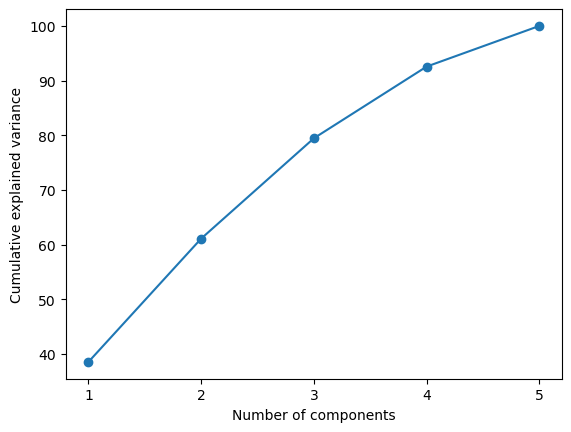

In [22]:
#Note that, the value of  can be set in a wiser way through explained variance. 
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.
eig_vals_total = sum(sorted_eigenvalue)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalue]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

### Choose the number of dimensions ($k$) by the cumulative explained variance, and consider first $k$ eigen vectors:
$$
   \Large \mathbf{W_{pca}}=\mathbf{W[1:k]}=[\mathbf{w_1},\mathbf{w_2},...\mathbf{w_k}]\in \mathbb{R}^{[D\mathrm{x}k]}
$$

In [28]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
display(eigenvector_subset)

array([[-0.42376297,  0.63226191],
       [-0.60210747,  0.08555774],
       [-0.42733728, -0.39079975],
       [ 0.26244094,  0.66182525],
       [ 0.45431172, -0.04677229]])

### Project the centered data onto the $\mathbf{W_{pca}}$:
$$
  \Large  \mathbf{X_{pca}}=\mathbf{X_{std}}\mathbf{W_{pca}}
$$
### This results the data $\mathbf{X_{pca}}\in \mathbb{R}^{[N\mathrm{x}k]}$ of $k$ dimensional points

In [29]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
display(X_reduced)

array([[ 12.60109353,   3.73943493],
       [ -0.5621103 ,   5.86803809],
       [  7.88548151,   4.34719383],
       [  0.89490897, -16.37857701],
       [ -8.52029707,   8.53756243],
       [ -1.76612135,  -5.15197759],
       [ -1.6839112 , -27.57866737],
       [  3.8784937 ,   7.87640715],
       [-17.20714263,   5.01582643],
       [-13.38334959, -16.00924238],
       [ 21.21887003,   2.86369849],
       [ -9.11764138,   5.1689532 ],
       [ 10.04551992,  -2.18111527],
       [ -3.11012675,  19.91730714],
       [ -3.01098111, -11.49654032],
       [ -1.59585205, -13.10381356],
       [-23.88792752,   4.94446923],
       [ 27.26126075,   4.64439638],
       [ -7.24805783,   2.850925  ],
       [  7.30789037,  16.12572121]])

### All PCA steps at one place:
#### Example 2

In [32]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [33]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


<Axes: xlabel='PC1', ylabel='PC2'>

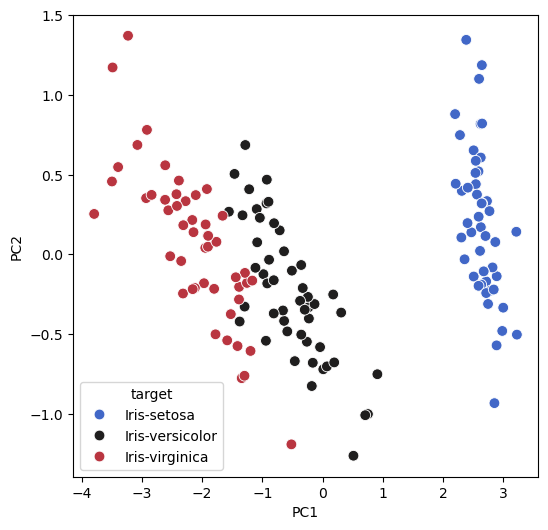

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
